<a href="https://colab.research.google.com/github/RaahulRaj25/RaahulRaj25/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1551   56]
 [ 226  167]]


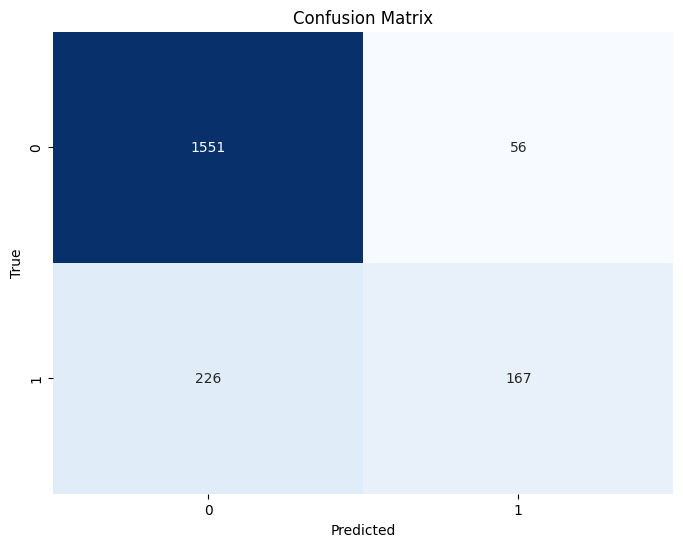

In [1]:

"""
TASK 3:CUSTOMER CHURN PREDICTION

@author: Rahul Raj Singh
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Loading the dataset
data = pd.read_csv(r'/content/Churn_Modelling.csv')

# Excluded non-numeric columns like 'Surname'
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = data[numeric_columns]

# Splitting data in target label
y = data['Exited']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building and training the model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
